In [50]:
# init packages
import requests
import re
import nltk
from sklearn.feature_extraction import text
import openai
import os
import json
from prettytable import PrettyTable
import csv


from wordcloud import WordCloud
from matplotlib import pyplot as plt

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()


from bs4 import BeautifulSoup as bs


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zamek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
url_1 = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv' # The Shawshank Redemption
url_2 = 'https://www.imdb.com/title/tt0110912/reviews?ref_=tt_urv' # Pulp Fiction
url_3 = 'https://www.imdb.com/title/tt0816692/reviews?ref_=tt_urv' # Interstellar

# stop_words = text.ENGLISH_STOP_WORDS.union(['movie', 'film'])
stop_words = text.ENGLISH_STOP_WORDS


In [3]:


def get_movie_data(url_):
    req = requests.get(url_)
    soup = bs(req.text, 'html.parser')

    movie_title = soup.find('a', {'itemprop': 'url'}).text
    movie_release_date = re.findall(r'\d+', soup.find('span', {'class': 'nobr'}).text)[0]
    movie_reviews = soup.find_all('div', {'class': 'text show-more__control'})

    movie_reviews_texts = []
    movie_review_count = 0

    for review in movie_reviews:
        movie_review_count += 1
        review_text_clean = re.sub(r'[^a-zA-Z ]+', '', review.text)
        movie_reviews_texts.append(review_text_clean)


    movie_data_ = {
        'title': movie_title,
        'date': movie_release_date,
        'count': movie_review_count,
        'reviews': movie_reviews_texts
                  }

    return movie_data_

def get_lower_text_reviews(review_list_):
    review_list_lower_ = []

    for review in review_list_:
        review_list_lower_.append(review.lower())

    return review_list_lower_



def remove_stop_words(review_list_):
    review_list_preprocessed_ = []

    for review in review_list_:
        words = review.split()
        new_review = ''

        for word in words:
            if word in stop_words:
                pass
            else:
                new_review += word + ' '

        review_list_preprocessed_.append(new_review)

    return review_list_preprocessed_

def determine_sentiment(movie_reviews_):
    positive_reviews = []
    negative_reviews = []
    neutral_reviews = []

    for review in movie_reviews_:
        sentiment_score = sa.polarity_scores(review)
        compound = sentiment_score['compound']

        if compound >= 0.90:
            positive_reviews.append(review)
        elif compound <= -0.90:
            negative_reviews.append(review)
        else:
            neutral_reviews.append(review)

    sentiment_data = {
        'positive': positive_reviews,
        'negative': negative_reviews,
        'neutral': neutral_reviews
    }

    return sentiment_data


def get_count_of_review_types(sentiment_data_):
    positive_count = len(sentiment_data_.get('positive'))
    negative_count = len(sentiment_data_.get('negative'))
    neutral_count = len(sentiment_data_.get('neutral'))

    review_type_count_ = {
        'positive_count': positive_count,
        'negative_count': negative_count,
        'neutral_count': neutral_count
    }

    return review_type_count_

# movie data
movie_data_1 = get_movie_data(url_1)
movie_data_2 = get_movie_data(url_2)
movie_data_3 = get_movie_data(url_3)

# preprocess text
review_list_lower_1 = get_lower_text_reviews(movie_data_1.get('reviews'))
review_list_lower_2 = get_lower_text_reviews(movie_data_2.get('reviews'))
review_list_lower_3 = get_lower_text_reviews(movie_data_3.get('reviews'))

review_list_preprocessed_1 = remove_stop_words(review_list_lower_1)
review_list_preprocessed_2 = remove_stop_words(review_list_lower_2)
review_list_preprocessed_3 = remove_stop_words(review_list_lower_3)

# print(review_list_preprocessed_1)
# print(review_list_preprocessed_2)
# print(review_list_preprocessed_3)


# review sentiment
review_sentiment_1 = determine_sentiment(review_list_preprocessed_1)
review_sentiment_2 = determine_sentiment(review_list_preprocessed_2)
review_sentiment_3 = determine_sentiment(review_list_preprocessed_3)

# review type count
review_type_count_1 = get_count_of_review_types(review_sentiment_1)
review_type_count_2 = get_count_of_review_types(review_sentiment_2)
review_type_count_3 = get_count_of_review_types(review_sentiment_3)




# print(review_type_count_1)
# print(review_type_count_2)
# print(review_type_count_3)


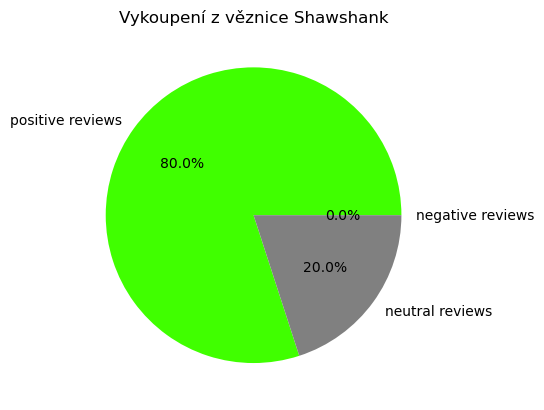

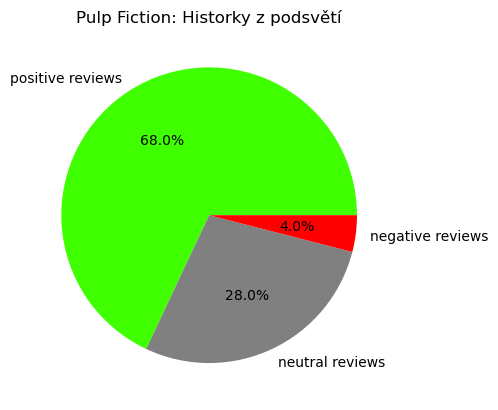

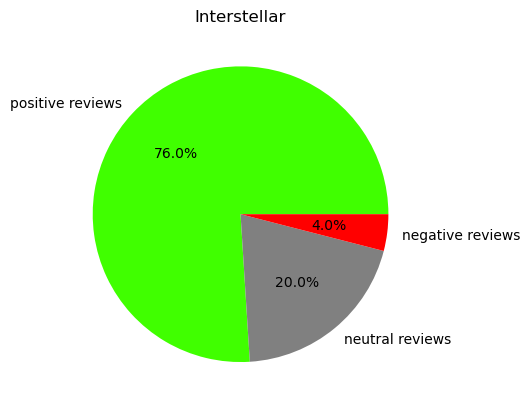

In [4]:
'''
Pie Charts
'''

def func(percent):
    return "{:1.1f}%".format(percent)

def percentage_pie_graph(review_type_count_, movie_title_):
    y = [
        review_type_count_.get('positive_count'),
        review_type_count_.get('neutral_count'),
        review_type_count_.get('negative_count')
    ]
    pie_labels = ['positive reviews', 'neutral reviews', 'negative reviews']
    pie_colors = ['#40ff00', '#808080', '#ff0000']

    plt.title(movie_title_)
    plt.pie(y, labels = pie_labels, colors = pie_colors, autopct = lambda percent: func(percent))
    plt.show()

percentage_pie_graph(review_type_count_1, movie_data_1.get('title'))
percentage_pie_graph(review_type_count_2, movie_data_2.get('title'))
percentage_pie_graph(review_type_count_3, movie_data_3.get('title'))


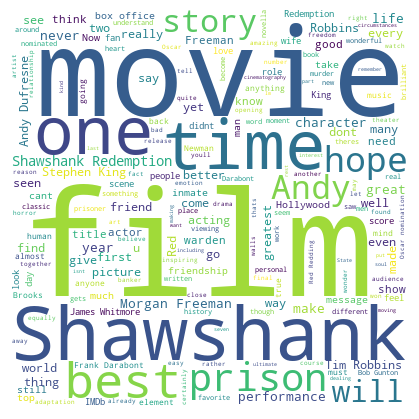

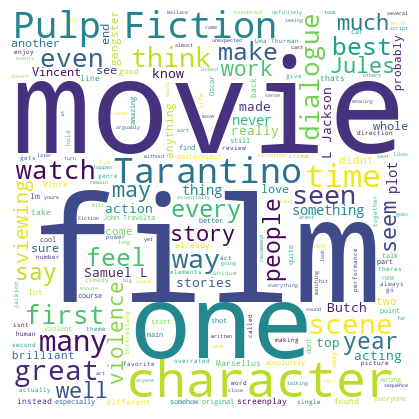

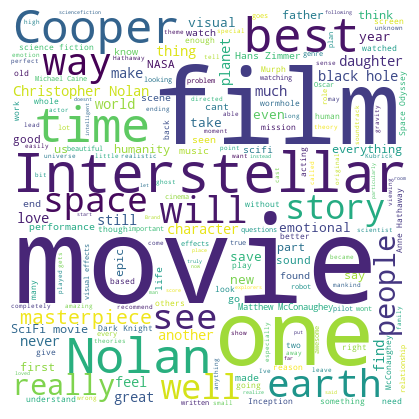

In [5]:
'''
Word Clouds
'''

def list_of_reviews_to_string(reviews_list_):
    big_string = ''

    for word in reviews_list_:
        big_string += word

    return big_string


def generate_word_cloud(movie_reviews_):
    reviews_string = list_of_reviews_to_string(movie_reviews_)

    word_cloud = WordCloud(width=400, height=400, background_color='white').generate(reviews_string)

    plt.figure(figsize=(4, 4), facecolor=None)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


generate_word_cloud(movie_data_1.get('reviews'))
generate_word_cloud(movie_data_2.get('reviews'))
generate_word_cloud(movie_data_3.get('reviews'))


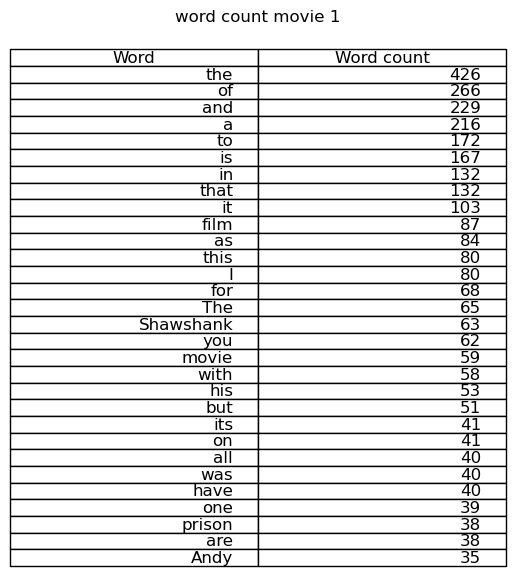

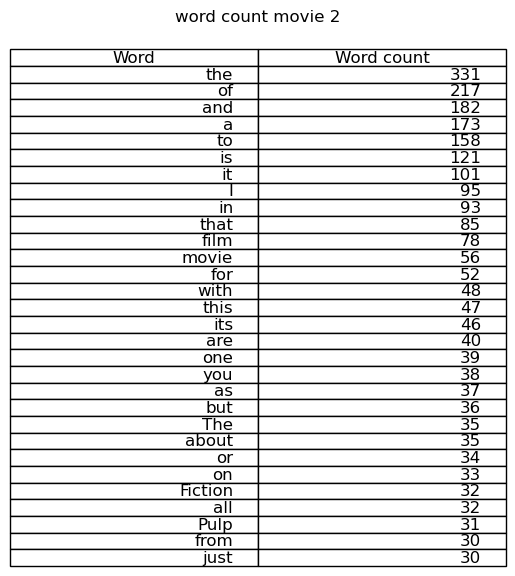

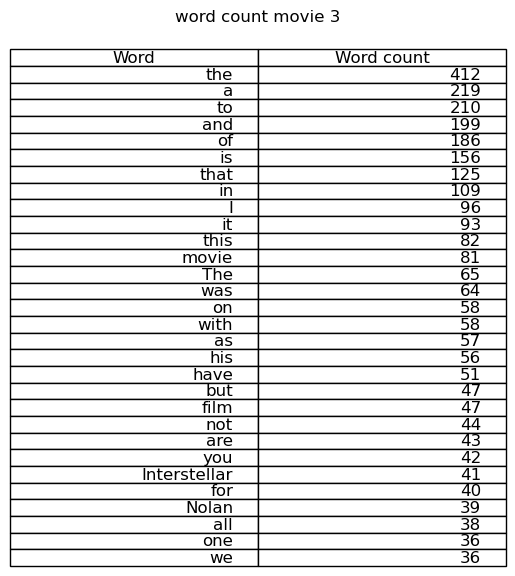

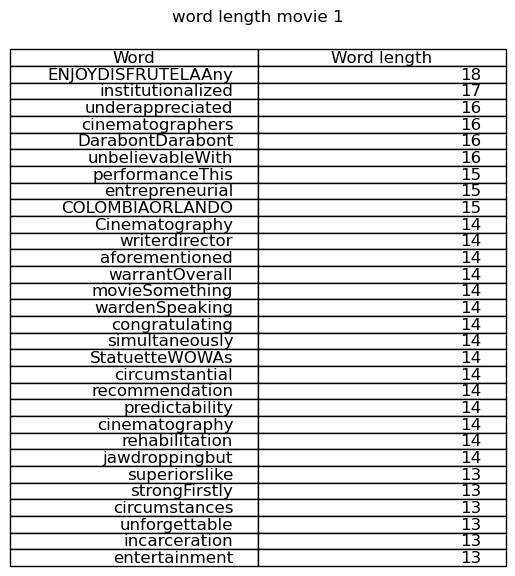

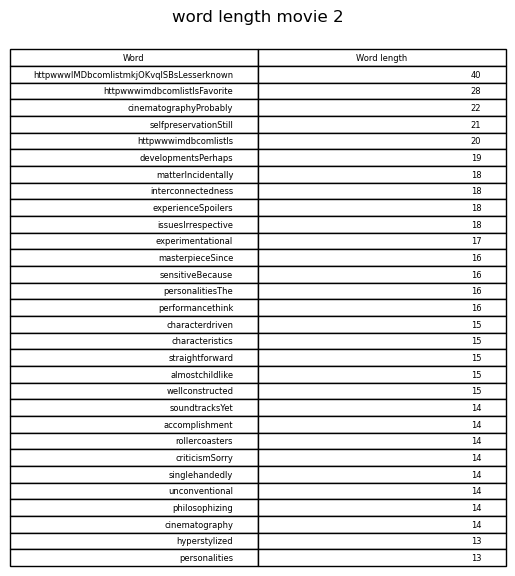

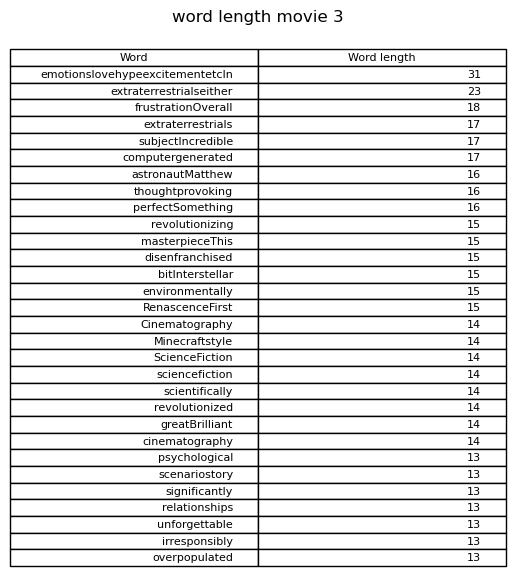

In [6]:
'''
Tables
'''

def reviews_to_word_list(reviews_list_):
    word_list_ = []

    for review in reviews_list_:
        word_list_.append(review.split())

    word_list_ = [item for sublist in word_list_ for item in sublist]

    return word_list_


def get_unique_words(review_list_):
    word_list_ = reviews_to_word_list(review_list_)

    return list(set(word_list_))



def get_word_count(reviews_list_, n):
    word_count = {}

    for review in reviews_list_:
        words = review.split()

        for word in words:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    word_count_sorted = sorted(word_count.items(), key=lambda item: item[1], reverse=True)
    word_count_sorted_reduced = dict(word_count_sorted[:n])

    return word_count_sorted_reduced



def get_longest_words(reviews_list_, n):
    word_list_unique_ = get_unique_words(reviews_list_)
    word_list_unique_sorted = sorted(word_list_unique_, key=len, reverse=True)

    return word_list_unique_sorted[:n]


def create_word_count_table(data, title):
    fig, ax = plt.subplots()
    column_labels =('Word', 'Word count')
    ax.set_title(title, y=1.2, pad=20)

    ax.axis('off')
    ax.axis('tight')

    table_data = []
    for word, count in data.items():
        table_data.append([word, count])

    table = ax.table(
        cellText=table_data,
        colLabels=column_labels,
        loc='center')

    table.set_fontsize(12)

    plt.show()


def create_word_length_table(data, title):
    fig, ax = plt.subplots()
    column_labels =('Word', 'Word length')
    ax.set_title(title, y=1.2, pad=20)

    ax.axis('off')
    ax.axis('tight')

    table_data = []
    for word in data:
        table_data.append([word, len(word)])

    table = ax.table(
        cellText=table_data,
        colLabels=column_labels,
        loc='center')

    table.set_fontsize(12)

    plt.show()

word_count_1 = get_word_count(movie_data_1.get('reviews'), 30)
word_count_2 = get_word_count(movie_data_2.get('reviews'), 30)
word_count_3 = get_word_count(movie_data_3.get('reviews'), 30)

create_word_count_table(word_count_1, 'word count movie 1')
create_word_count_table(word_count_2, 'word count movie 2')
create_word_count_table(word_count_3, 'word count movie 3')

longest_words_1 = get_longest_words(movie_data_1.get('reviews'), 30)
longest_words_2 = get_longest_words(movie_data_2.get('reviews'), 30)
longest_words_3 = get_longest_words(movie_data_3.get('reviews'), 30)

create_word_length_table(longest_words_1, 'word length movie 1')
create_word_length_table(longest_words_2, 'word length movie 2')
create_word_length_table(longest_words_3, 'word length movie 3')



In [125]:
with open('./OPENAI_API_KEY', 'r') as file:
    openai.api_key = file.read().replace('\n', '')


# this uses old gpt3 models
def summarize_reviews_old(review_list, model):
    summarized_reviews = []

    for review in review_list:
        response = openai.Completion.create(
            model=model,
            prompt='Summarize this movie review while keeping it\'s meaning.'
                   ''
                   + review,
            temperature=0.7,
            max_tokens=256,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0
        )
        response_data = json.dumps(response)
        response_text = json.loads(response_data)["choices"][0]["text"]
        summarized_reviews.append(response_text.strip())

    return summarized_reviews

def summarize_reviews_new(review_list, model):
    summarize_reviews = []

    for review in review_list:
        response = openai.ChatCompletion.create(
            model=model,
            messages = [{"role": "user",
                         "content": review}],
            temperature=0.7,
            max_tokens=128,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0

        )
        response_data = json.dumps(response)
        response_text = json.loads(response_data)["choices"][0]["message"]["content"]
        summarize_reviews.append(response_text)

    return summarize_reviews

summarized_reviews_old = summarize_reviews_old(review_list_lower_1, "text-babbage-001")
summarized_reviews_new = summarize_reviews_new(review_list_lower_1, "gpt-3.5-turbo")


In [128]:
combined_reviews_old = {
    "default": review_list_lower_1,
    "summarized": summarized_reviews_old
}

combined_reviews_new = {
    "default": review_list_lower_1,
    "summarized": summarized_reviews_new
}

def print_reviews(combined_reviews_old_, combined_reviews_new_, default_reviews):
    for i in range(len(combined_reviews_new_["default"])):
        print("default: \n", default_reviews[i])
        print("\n")
        print("summarized[GPT 3]: ", combined_reviews_old_["summarized"][i])
        print("\n")
        print("summarized[GPT 3.5]: ", combined_reviews_new_["summarized"][i])
        print("\n")
        print("-" * 50)
        print("\n")

print_reviews(combined_reviews_old, combined_reviews_new, review_list_lower_1)


default: 
 the shawshank redemption is written and directed by frank darabont it is an adaptation of the stephen king novella rita hayworth and shawshank redemption starring tim robbins and morgan freeman the film portrays the story of andy dufresne robbins a banker who is sentenced to two life sentences at shawshank state prison for apparently murdering his wife and her lover andy finds it tough going but finds solace in the friendship he forms with fellow inmate ellis red redding freeman while things start to pick up when the warden finds andy a prison job more befitting his talents as a banker however the arrival of another inmate is going to vastly change things for all of themthere was no fanfare or bunting put out for the release of the film back in  with a title that didnt give much inkling to anyone about what it was about and with columbia pictures unsure how to market it shawshank redemption barely registered at the box office however come academy award time the film received